# Numerical solution of the Kuramoto-Sivashinsky Equation using Fourier spectral methods

Equations are taken from this paper: https://engineeringresearch.org/index.php/GJRE/article/view/1140/1072

In [1]:
using DifferentialEquations,FFTW,Plots, LSODA

In [2]:
N = 512
L = π
ν = 0.02
k = ifftshift(range(-N÷2,N÷2-1,N))
k2 = @. k^2
k4 = @. k^4
x = range(-L,L,N);

In [3]:
function Kuramoto!(du, u, p, t)
    N, L = p
    u_   = fft(u)
    u_2  = fft(u.^2)
    duk = @. (k2 - ν*k4)*u_-im*k/2*u_2
    du .= real.(ifft(duk))
end

Kuramoto! (generic function with 1 method)

In [4]:
u0 = -sin.(x)
p = [N,L]
tspan = (0.0, 200);

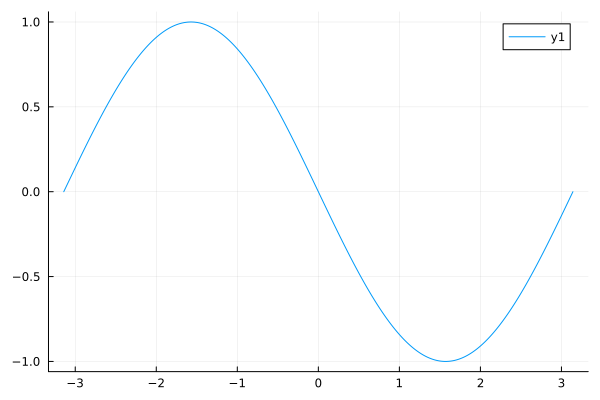

In [5]:
plot(x,u0)

In [6]:
prob = ODEProblem(Kuramoto!, u0, tspan, p);

In [7]:
sol = solve(prob,lsoda(),dt=2e-10,saveat=tspan[2]/5e4);

In [8]:
u = hcat(real.(sol.u)...)
heatmap(sol.t,x,u,c=:viridis,xlabel="t",ylabel="x")
savefig("myplot.png") 

"/home/nadorij/Elementary_chaos_theory/myplot.png"